In [2]:
source('helpers.R')
kaggle.house.loadLibraries()

df.combined = kaggle.house.PrepareCombinedDataSet()
df.lot_frontage = df.combined %>% filter(!is.na(LotFrontage))
df.lot_frontage %>% count()

n
2433


In [11]:
kaggle.house.lmSplitByCategAttrs = function (df, lm.formula, min.group.count) {
    
    formulaVars = as.list(attr(terms(lm.formula), "variables"))[-1]
    categColNames = names(which(sapply(df, is.character)))
    colNames = c(
                    categColNames, 
                    sapply(formulaVars, deparse)
                )
    
    df %>% 
        select(colNames) %>%
        gather_("attr", "attr_val", gather_cols=categColNames) %>%
        group_by_("attr", "attr_val") %>%
        do(glance(lm(lm.formula, data=.))) %>%
        mutate(n = df + df.residual) %>%
        filter(n >= min.group.count) %>%
        arrange(desc(r.squared))
}

x = kaggle.house.lmSplitByCategAttrs(
        df=df.lot_frontage, 
        lm.formula=LotFrontage.Log ~ LotArea.Log, 
        min.group.count=50)

x %>% head(20) %>% select(-AIC, -BIC)

attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
MSZoning,FV,0.8955410,0.8946482,0.1570255,1003.0563,3.153496e-59,2,52.465143,2.884869,117,119
Exterior2nd,CmentBd,0.8471182,0.8457888,0.2291791,637.2150,1.015011e-48,2,7.363244,6.040154,115,117
Functional,Min1,0.8315386,0.8282990,0.1552289,256.6761,9.317601e-22,2,24.990433,1.252993,52,54
Neighborhood,Somerst,0.8250515,0.8239581,0.1900050,754.5549,1.875909e-62,2,40.172389,5.776303,160,162
HouseStyle,SFoyer,0.8144048,0.8114113,0.2027298,272.0604,2.358349e-24,2,12.340287,2.548161,62,64
SaleType,COD,0.8043653,0.8015300,0.1712578,283.6982,3.816108e-26,2,25.555255,2.023718,69,71
Exterior1st,CemntBd,0.8028090,0.8010793,0.2582962,464.1197,5.344129e-42,2,-6.564952,7.605730,114,116
Exterior2nd,HdBoard,0.7873747,0.7866564,0.1970255,1096.1206,1.601188e-101,2,62.237534,11.490434,296,298
MSSubClass,160,0.7722380,0.7702401,0.1228811,386.5224,2.013711e-38,2,79.610289,1.721372,114,116
LotShape,Reg,0.7656413,0.7655054,0.1727158,5635.5120,0.000000e+00,2,583.292403,51.458011,1725,1727


MSZoning,n
FV,119
RL,43


MSZoning,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
FV,0.8955410,0.89464816,0.1570255,1003.056342,3.153496e-59,2,52.46514,-98.93029,-90.59291,2.884869,117
RL,0.0843531,0.06202025,0.1550022,3.777086,5.884519e-02,2,20.17523,-34.35046,-29.06686,0.985053,41


MSZoning,term,estimate,std.error,statistic,p.value
FV,(Intercept),-3.2693563,0.22936357,-14.254035,2.438426e-27
FV,LotArea.Log,0.8334903,0.02631709,31.671065,3.153496e-59
RL,(Intercept),6.6394075,1.17797265,5.636300,1.422219e-06
RL,LotArea.Log,-0.2463684,0.12676712,-1.943473,5.884519e-02


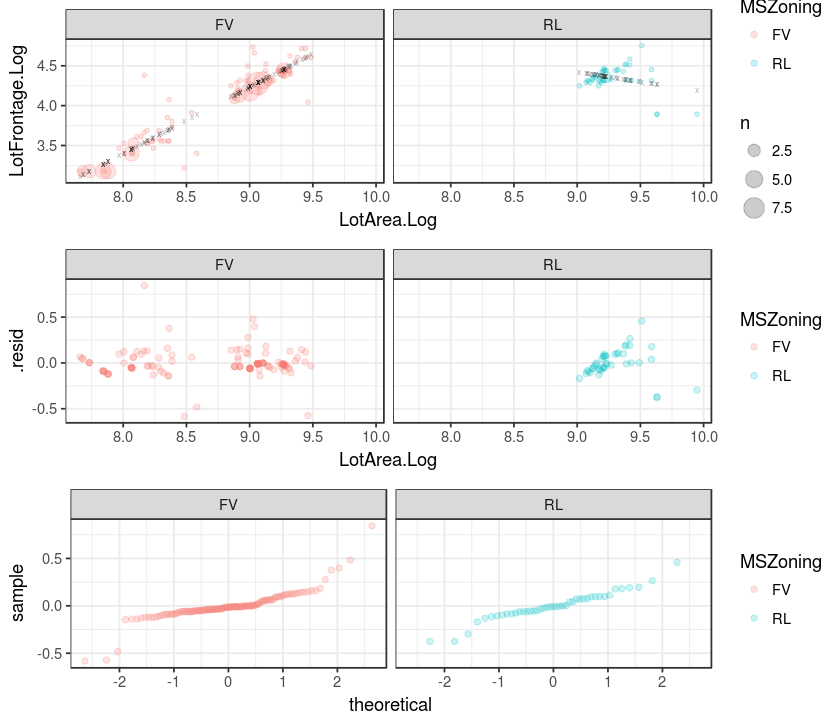

In [23]:
options(repr.plot.width = 7, repr.plot.height = 6)

df = 
    df.lot_frontage %>% 
    filter(Neighborhood == 'Somerst') %>%
    group_by(MSZoning)

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

g1 = 
    ggplot() +
    geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour = MSZoning), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    facet_wrap(~MSZoning) +
    theme_bw()

g2 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=MSZoning), alpha=0.2) +
    facet_wrap(~MSZoning) +
    theme_bw()

g3 =
    ggplot(fitted, aes(sample=.resid, colour=MSZoning)) +
    stat_qq(distribution=qnorm, alpha=0.2) +
    facet_wrap(~MSZoning) +
    theme_bw()

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)

BldgType2,n
1Fam,1312
Duplex+2fmCon,132
Townhouse,170


BldgType2,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
1Fam,0.4661188,0.4657113,0.1676043,1143.72963,9.656079e-181,2,482.78183,-959.5637,-944.02574,36.799453,1310
Duplex+2fmCon,0.2683104,0.2626820,0.1631786,47.67097,2.006807e-10,2,53.01191,-100.0238,-91.37541,3.461542,130
Townhouse,0.8062796,0.8051265,0.1629921,699.22940,9.067947e-62,2,68.17547,-130.3509,-120.94354,4.463160,168


BldgType2,term,estimate,std.error,statistic,p.value
1Fam,(Intercept),-0.2295110,0.13224982,-1.735435,8.289892e-02
1Fam,LotArea.Log,0.4903098,0.01449803,33.819072,9.656079e-181
Duplex+2fmCon,(Intercept),1.2682744,0.42609110,2.976533,3.477735e-03
Duplex+2fmCon,LotArea.Log,0.3232521,0.04681817,6.904416,2.006807e-10
Townhouse,(Intercept),-1.6141646,0.19151533,-8.428383,1.517367e-14
Townhouse,LotArea.Log,0.6333996,0.02395344,26.442946,9.067947e-62


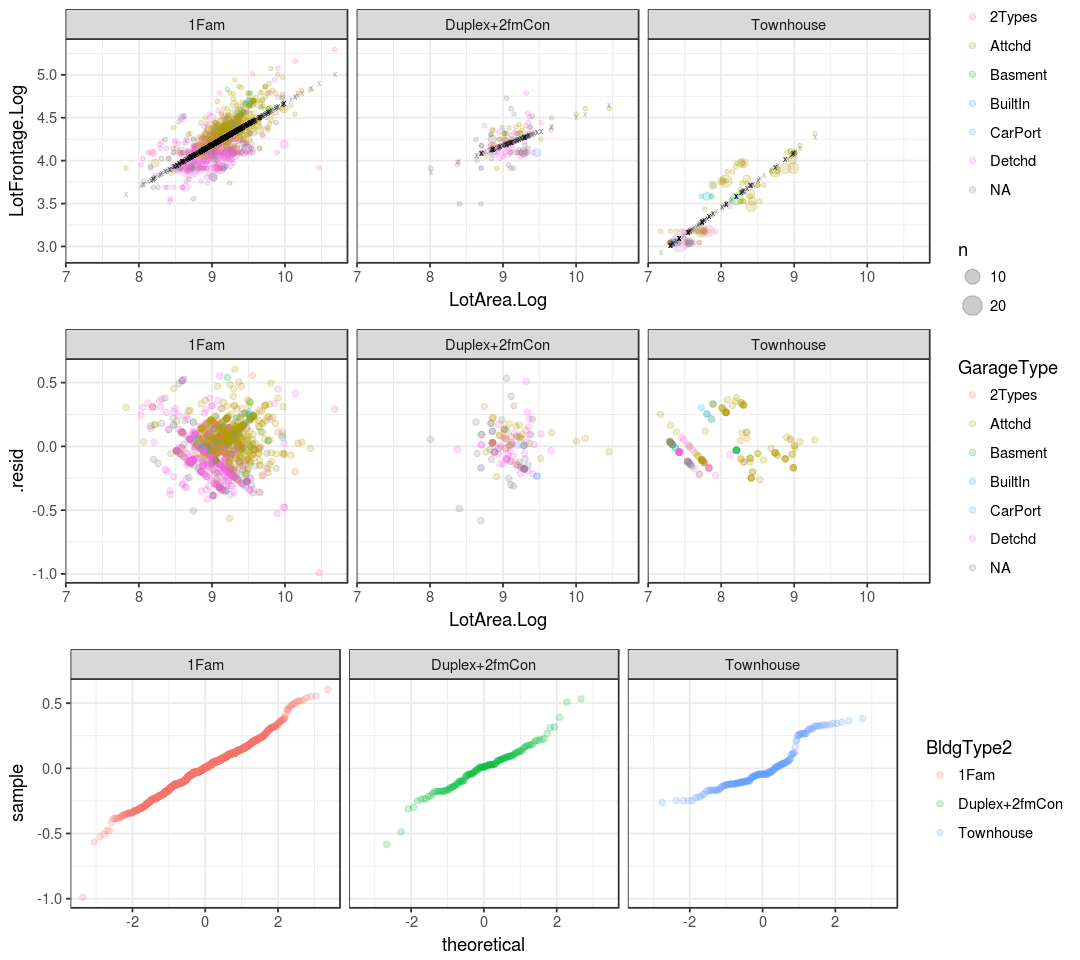

In [60]:
options(repr.plot.width = 9, repr.plot.height = 8)

df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 == 'Reg') %>%
    group_by(BldgType2)

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

g1 = 
    ggplot() +
    geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour=GarageType), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    facet_wrap(~BldgType2) +
    theme_bw()

g2 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=GarageType), alpha=0.2) +
    facet_wrap(~BldgType2) +
    theme_bw()

g3 =
    ggplot(fitted, aes(sample=.resid)) +
    stat_qq(aes(colour=BldgType2), distribution=qnorm, alpha=0.2) +
    facet_wrap(~BldgType2) +
    theme_bw()

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)

In [27]:
df.data = df.lot_frontage %>% filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg')
df.data %>% count()

colNames = names(which(sapply(df.data, is.character)))
colNames = c(colNames, "LotFrontage.Log", "LotArea.Log")

df.rsquared = df.data %>% 
    select(colNames) %>% 
    gather(attr, attr_val, -LotFrontage.Log, -LotArea.Log) %>% 
    group_by(attr, attr_val) %>%
    do(glance(lm(LotFrontage.Log ~ LotArea.Log, data=.))) %>%
    mutate(n = df + df.residual) %>%
    arrange(desc(r.squared))


df.rsquared %>% filter(n > 50) %>% head(10) %>% select(-AIC, -BIC)

n
657


Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”

attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
MasVnrType,Stone,0.5714128,0.5669483,0.2525811,127.99173,2.321765e-19,2,-3.195371,6.124530,96,98
Neighborhood,NridgHt,0.5631450,0.5576152,0.2353125,101.83804,7.340045e-16,2,3.272629,4.374387,79,81
LotConfig,Corner,0.4233094,0.4185434,0.2039118,88.81790,3.790331e-16,2,22.057113,5.031183,121,123
LotConfig2,Corner,0.4233094,0.4185434,0.2039118,88.81790,3.790331e-16,2,22.057113,5.031183,121,123
Exterior2nd,HdBoard,0.3784050,0.3697717,0.2937094,43.83105,5.494002e-09,2,-13.325530,6.211097,72,74
LandContour,HLS,0.3577075,0.3494730,0.3153639,43.43999,4.677927e-09,2,-20.180136,7.757445,78,80
HeatingQC,Gd,0.3377199,0.3294414,0.2578617,40.79481,1.038930e-08,2,-4.203357,5.319414,80,82
Exterior1st,HdBoard,0.3316309,0.3239485,0.2964314,43.16761,3.543830e-09,2,-17.055511,7.644827,87,89
Neighborhood,NAmes,0.3296746,0.3195181,0.2957408,32.45964,3.067257e-07,2,-12.630320,5.772531,66,68
OverallQual,8,0.3152340,0.3099666,0.3230782,59.84587,2.501385e-12,2,-37.150593,13.569337,130,132


n
123


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.4233094,0.4185434,0.2039118,88.8179,3.790331e-16,2,22.05711,-38.11423,-29.67767,5.031183,121


term,estimate,std.error,statistic,p.value
(Intercept),-0.4245613,0.52604986,-0.8070743,4.212073e-01
LotArea.Log,0.5300931,0.05624733,9.4243247,3.790331e-16


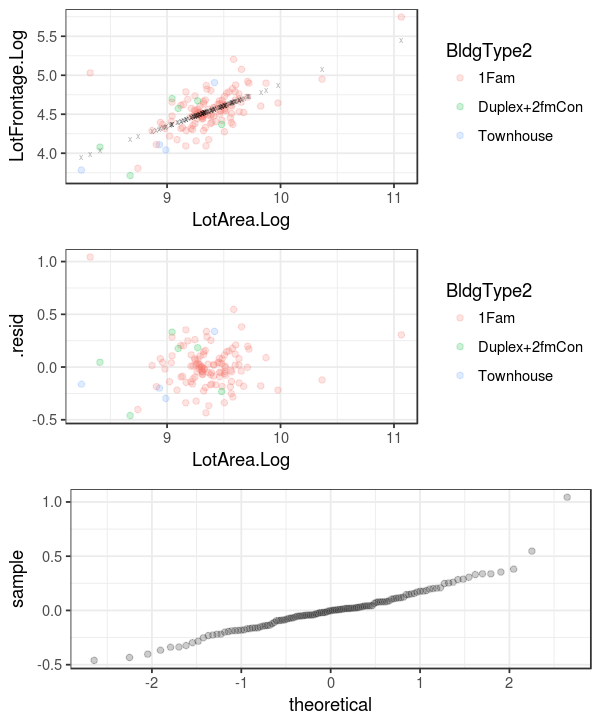

In [32]:
options(repr.plot.width = 5, repr.plot.height = 6)

df = df.lot_frontage %>% filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg' & LotConfig2 == 'Corner')

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

g1 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour = BldgType2), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    theme_bw()

g2 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=BldgType2), alpha=0.2) +
    theme_bw()

g3 =
    ggplot(fitted, aes(sample=.resid)) +
    stat_qq(distribution=qnorm, alpha=0.2) +
    theme_bw()

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)

In [33]:
df.data = df.lot_frontage %>% filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg' & LotConfig2 != 'Corner')
df.data %>% count()

colNames = names(which(sapply(df.data, is.character)))
colNames = c(colNames, "LotFrontage.Log", "LotArea.Log")

df.rsquared = df.data %>% 
    select(colNames) %>% 
    gather(attr, attr_val, -LotFrontage.Log, -LotArea.Log) %>% 
    group_by(attr, attr_val) %>%
    do(glance(lm(LotFrontage.Log ~ LotArea.Log, data=.))) %>%
    mutate(n = df + df.residual) %>%
    arrange(desc(r.squared))


df.rsquared %>% filter(n > 50) %>% head(10) %>% select(-AIC, -BIC)

n
534


Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”

attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
Neighborhood,NridgHt,0.5067054,0.4984838,0.2468010,61.63117,8.816359e-11,2,-0.2089909,3.654645,60,62
MasVnrType,Stone,0.4609117,0.4537239,0.2565891,64.12379,1.153529e-11,2,-3.5035466,4.937848,75,77
Exterior2nd,HdBoard,0.3869363,0.3765454,0.2929469,37.23796,8.742202e-08,2,-10.6448985,5.063257,59,61
Exterior1st,HdBoard,0.3480925,0.3387795,0.2983166,37.37720,4.929945e-08,2,-14.0582302,6.229496,70,72
HeatingQC,Gd,0.3387824,0.3289135,0.2486172,34.32821,1.557116e-07,2,-0.8549445,4.141303,67,69
Neighborhood,NAmes,0.3283128,0.3148790,0.3119681,24.43941,9.028263e-06,2,-12.1926361,4.866204,50,52
LotConfig,Inside,0.3043203,0.3027062,0.2447940,188.53800,7.581044e-36,2,-4.0205519,25.827281,431,433
LotConfig2,Inside,0.3043203,0.3027062,0.2447940,188.53800,7.581044e-36,2,-4.0205519,25.827281,431,433
LandContour,HLS,0.3022949,0.2915610,0.3268595,28.16257,1.442296e-06,2,-19.1325769,6.944412,65,67
OverallQual,8,0.2696152,0.2627892,0.3358424,39.49812,7.255623e-09,2,-34.7236497,12.068539,107,109


is.townhowse,n
Not Townhouse,385
Townhouse,48


is.townhowse,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
Not Townhouse,0.1453702,0.1431388,0.2286513,65.14725,9.076447e-15,2,22.80085,-39.60170,-27.741972,20.023774,383
Townhouse,0.3083987,0.2933639,0.1999946,20.51231,4.187182e-05,2,10.16670,-14.33339,-8.719792,1.839901,46


is.townhowse,term,estimate,std.error,statistic,p.value
Not Townhouse,(Intercept),2.0049496,0.28639305,7.0006923,1.147665e-11
Not Townhouse,LotArea.Log,0.2483266,0.03076629,8.0713849,9.076447e-15
Townhouse,(Intercept),0.3611171,0.76119623,0.4744073,6.374539e-01
Townhouse,LotArea.Log,0.3977603,0.08782420,4.5290520,4.187182e-05


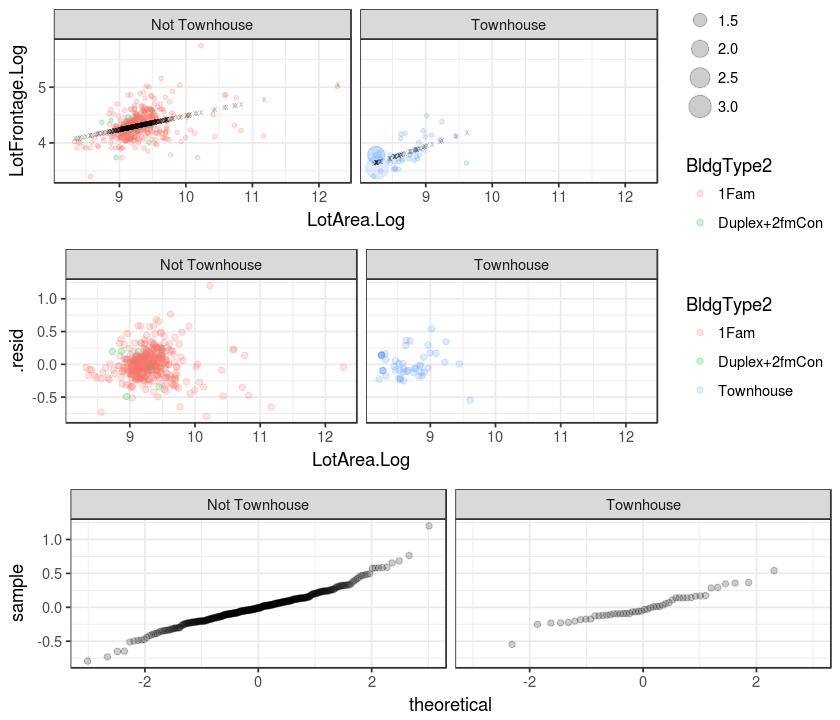

In [37]:
options(repr.plot.width = 7, repr.plot.height = 6)

df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg' & LotConfig2 == 'Inside') %>%
    mutate(is.townhowse = ifelse(BldgType2 == 'Townhouse', 'Townhouse', 'Not Townhouse')) %>%
    group_by(is.townhowse)

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

g1 = 
    ggplot() +
    geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour = BldgType2), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    facet_wrap(~is.townhowse) +
    theme_bw()

g2 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=BldgType2), alpha=0.2) +
    facet_wrap(~is.townhowse) +
    theme_bw()

g3 =
    ggplot(fitted, aes(sample=.resid)) +
    stat_qq(distribution=qnorm, alpha=0.2) +
    facet_wrap(~is.townhowse) +
    theme_bw()

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)

n
101


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.08690393,0.07768073,0.3723469,9.422326,0.002766346,2,-42.5219,91.04381,98.88917,13.72558,99


term,estimate,std.error,statistic,p.value
(Intercept),1.5822263,0.7898063,2.003309,0.047877393
LotArea.Log,0.2555048,0.0832377,3.069581,0.002766346


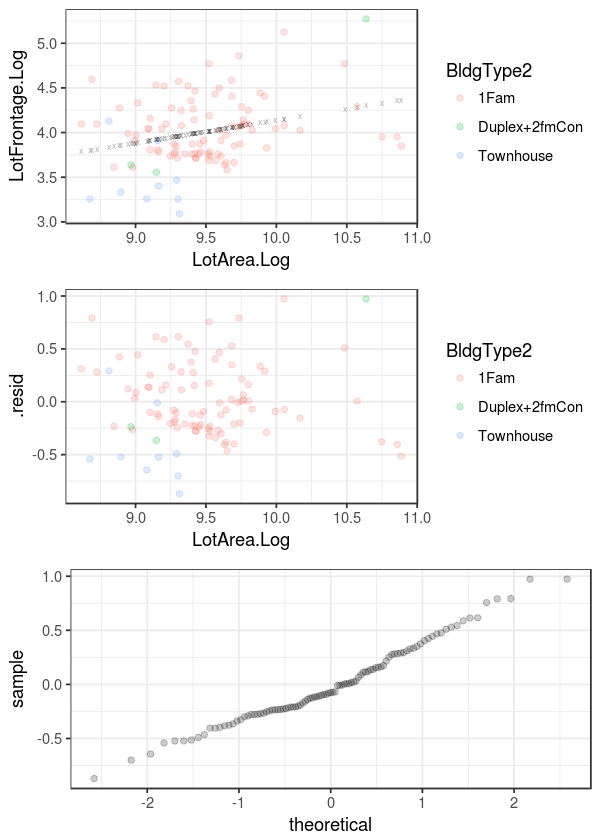

In [40]:
options(repr.plot.width = 5, repr.plot.height = 7)

df = df.lot_frontage %>% filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg' 
                                & LotConfig2 != 'Corner' & LotConfig2 != 'Inside')

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

g1 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour = BldgType2), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    theme_bw()

g2 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=BldgType2), alpha=0.2) +
    theme_bw()

g3 =
    ggplot(fitted, aes(sample=.resid)) +
    stat_qq(distribution=qnorm, alpha=0.2) +
    theme_bw()

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)